In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path

sys.path.append(str(Path().resolve().parent.parent))


In [2]:
import os
import glob
import numpy as np


In [3]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

import numpy as np
from tqdm import tqdm

In [7]:
folder_name = "dataset/Drawing/realistic/train/"


In [8]:
import cv2
from IPython import display
import mpl_toolkits

def plot(data, num):
    h_graph = 1
    w_graph = 2
    fig = plt.figure(figsize=(w_graph*5,h_graph*5))
    ax1 = fig.add_subplot(h_graph, w_graph, 1)
    ax2 = fig.add_subplot(h_graph, w_graph, 2)

    n_frame = len(data["image"])

    ax1.axis("off")
    ax2.axis("off")

    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

    dt = 1
    artists = []
    for t in range(0, n_frame, dt):
        im = data["image"][t]
        im1 = ax1.imshow(im)
        ax1.set_title("Observation")
        
        im = data["mask"][t]*255
        im2 = ax2.imshow(im)
        ax2.set_title("Mask")
        
        artists.append([im1,im2])

    # 4. アニメーション化
    anim = ArtistAnimation(fig, tqdm(artists), interval=100*dt)

    folder_name = "figs"

    os.makedirs(folder_name, exist_ok=True)
    save_file_name = f"{folder_name}/example_{num}.mp4"
    anim.save(save_file_name, writer='ffmpeg')
    plt.show()

    print("fin")

find 260 npy files!


100%|██████████| 116/116 [00:00<00:00, 4929.03it/s]


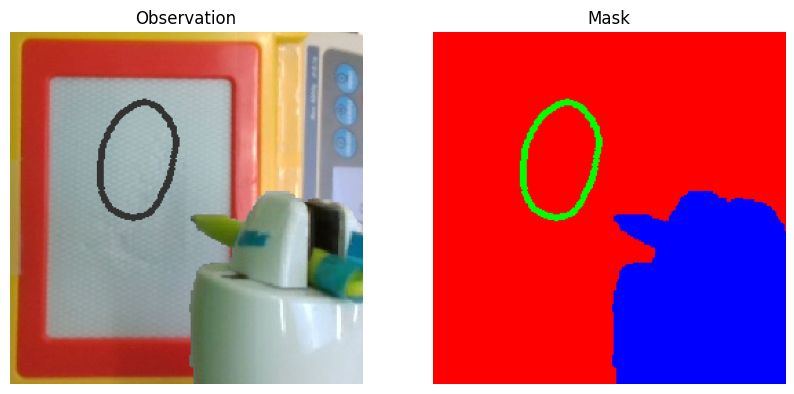

fin
find 260 npy files!


100%|██████████| 96/96 [00:00<00:00, 3984.42it/s]


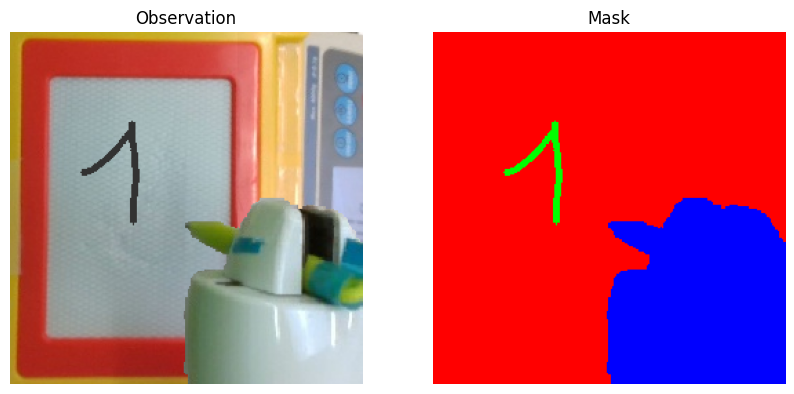

fin
find 260 npy files!


100%|██████████| 87/87 [00:00<00:00, 3955.99it/s]


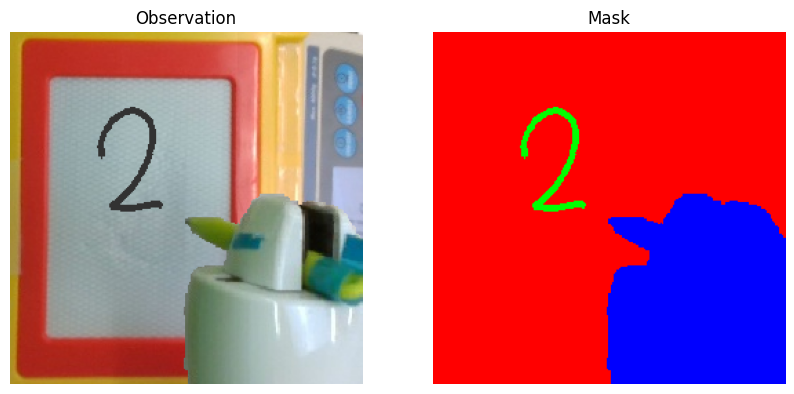

fin
find 260 npy files!


100%|██████████| 79/79 [00:00<00:00, 3136.92it/s]


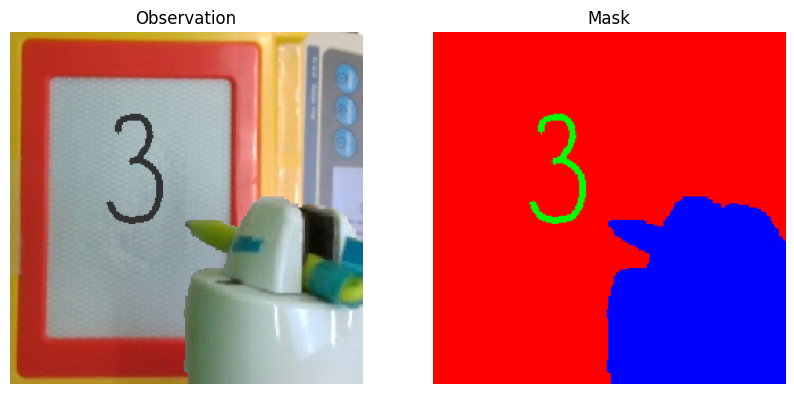

fin
find 265 npy files!


100%|██████████| 97/97 [00:00<00:00, 3722.27it/s]


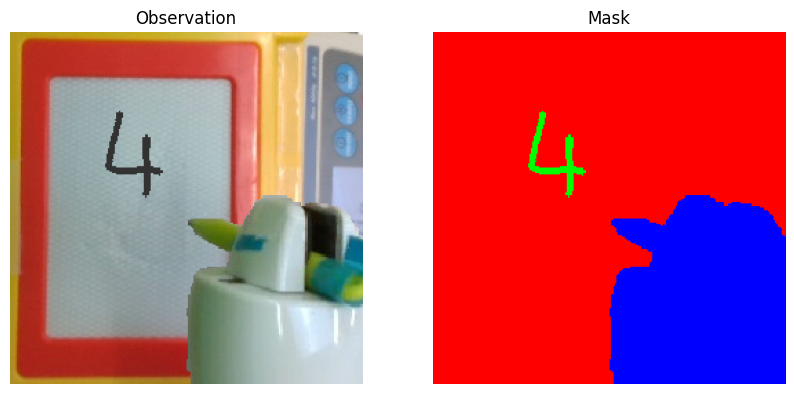

fin
find 265 npy files!


100%|██████████| 88/88 [00:00<00:00, 3117.05it/s]


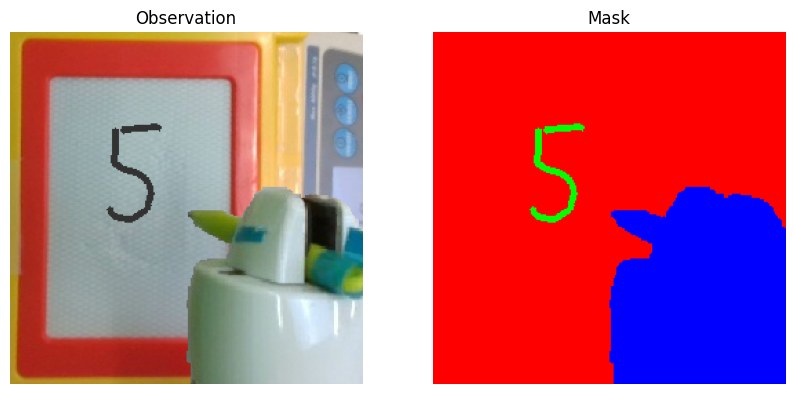

fin
find 265 npy files!


100%|██████████| 56/56 [00:00<00:00, 2303.55it/s]


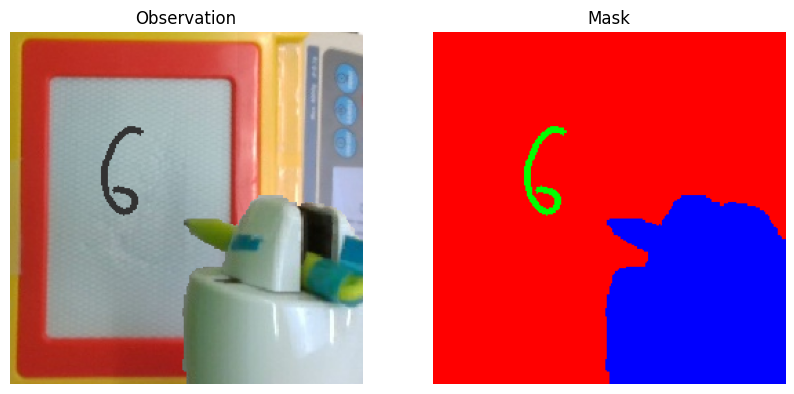

fin
find 265 npy files!


100%|██████████| 66/66 [00:00<00:00, 2558.33it/s]


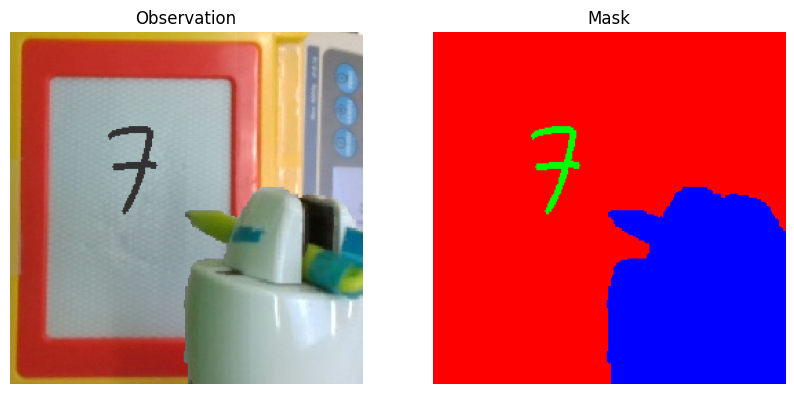

fin
find 269 npy files!


100%|██████████| 64/64 [00:00<00:00, 2345.03it/s]


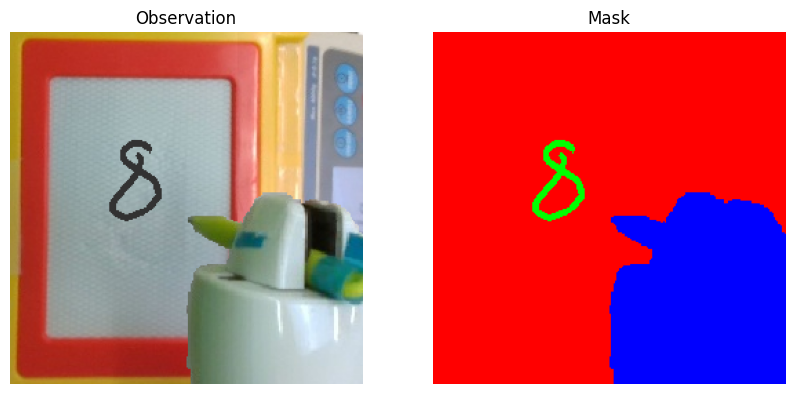

fin
find 270 npy files!


100%|██████████| 80/80 [00:00<00:00, 3168.95it/s]


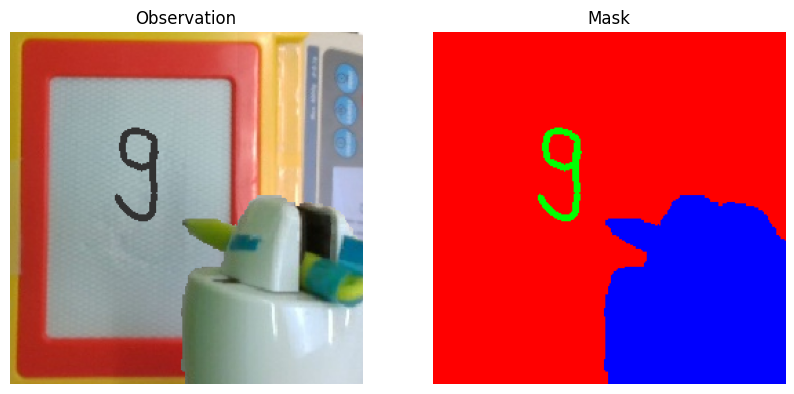

fin


In [9]:
for num in range(10):
    file_names = glob.glob(os.path.join(folder_name, f'{num}/*.npy'))
    n_episode = len(file_names)
    dataset = []

    print("find %d npy files!" % len(file_names))
    data = np.load(file_names[0], allow_pickle=True).item()
    plot(data, num)